In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd

In [6]:
import plotly.graph_objects as go

In [27]:
import plotly.express as px

In [7]:
import datetime as dt

In [57]:
df = pd.read_csv('./datalab/delhi-weather-data/testset.csv', nrows=5000, skipinitialspace=True, parse_dates=['datetime_utc'])

In [126]:
df.head()

,datetimeutc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,month
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010,0,0,30.0,0,0,5.0,280,West,7.4,11
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,0,0,0,28.0,0,0,0.0,0,North,0.0,11
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,0,0,0,24.0,0,0,0.0,0,North,0.0,11
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010,0,0,24.0,0,0,2.0,0,North,0.0,11
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011,0,0,23.0,0,0,1.2,0,North,0.0,11


In [24]:
# df.isnull().sum()

In [59]:
df.columns = df.columns.map(lambda x: x.replace("_", ""))

In [60]:
df.drop(['heatindexm', 'precipm', 'wgustm', 'windchillm'], axis=1, inplace=True)

In [61]:
df.fillna(0, inplace=True)

In [32]:
# df.describe()

In [62]:
df['dewptm'] = df['dewptm'].clip(lower=0)

In [63]:
df['pressurem'] = df['pressurem'].clip(lower =0 )

In [64]:
df['month'] = df['datetimeutc'].dt.month 

In [65]:
temperature_by_condition = df.groupby('conds')['tempm'].mean().reset_index()

<h2> Mean Temperature By Weather Condition </h2>

In [66]:
fig = px.bar(temperature_by_condition.sort_values(by='tempm', ascending=True), x = "conds", y= "tempm")
fig.show()

<h2>Mean Temperature By Months</h2>

In [67]:
mean_temperature_by_months = df.groupby('month')['tempm'].mean().reset_index()
fig = px.bar(mean_temperature_by_months.sort_values(by='tempm', ascending=True), x = "month", y= "tempm")
fig.show()

In [68]:
fig = px.scatter_matrix(df[['month','tempm']])
fig.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [127]:
# X = df.drop(['datetimeutc', 'conds'], axis=1)

In [135]:
# X = X.apply(LabelEncoder().fit_transform)
dummy = pd.get_dummies(df[['wdire']])

In [144]:
# dummy.columns = dummy.columns.map(lambda x: x.replace("wdire_",""))

df = pd.concat([dummy, df], axis=1)

In [146]:
df.drop('wdire', axis=1,inplace=True)

In [147]:
df.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'WNW', 'WSW', 'West', 'datetimeutc', 'conds',
       'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow', 'tempm',
       'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'month'],
      dtype='object')

In [148]:
X = df.drop(['datetimeutc', 'conds'], axis=1)

In [149]:
Y = df[['conds']]

In [150]:
Y = Y.apply(LabelEncoder().fit_transform)

In [151]:
Y = Y.astype(int)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=1)

In [153]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_train", y_train.shape)
print("Shape of Y_test", y_test.shape)

Shape of X_train (3500, 30)
Shape of X_test (1500, 30)
Shape of Y_train (3500, 1)
Shape of Y_test (1500, 1)


In [119]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7706666666666667


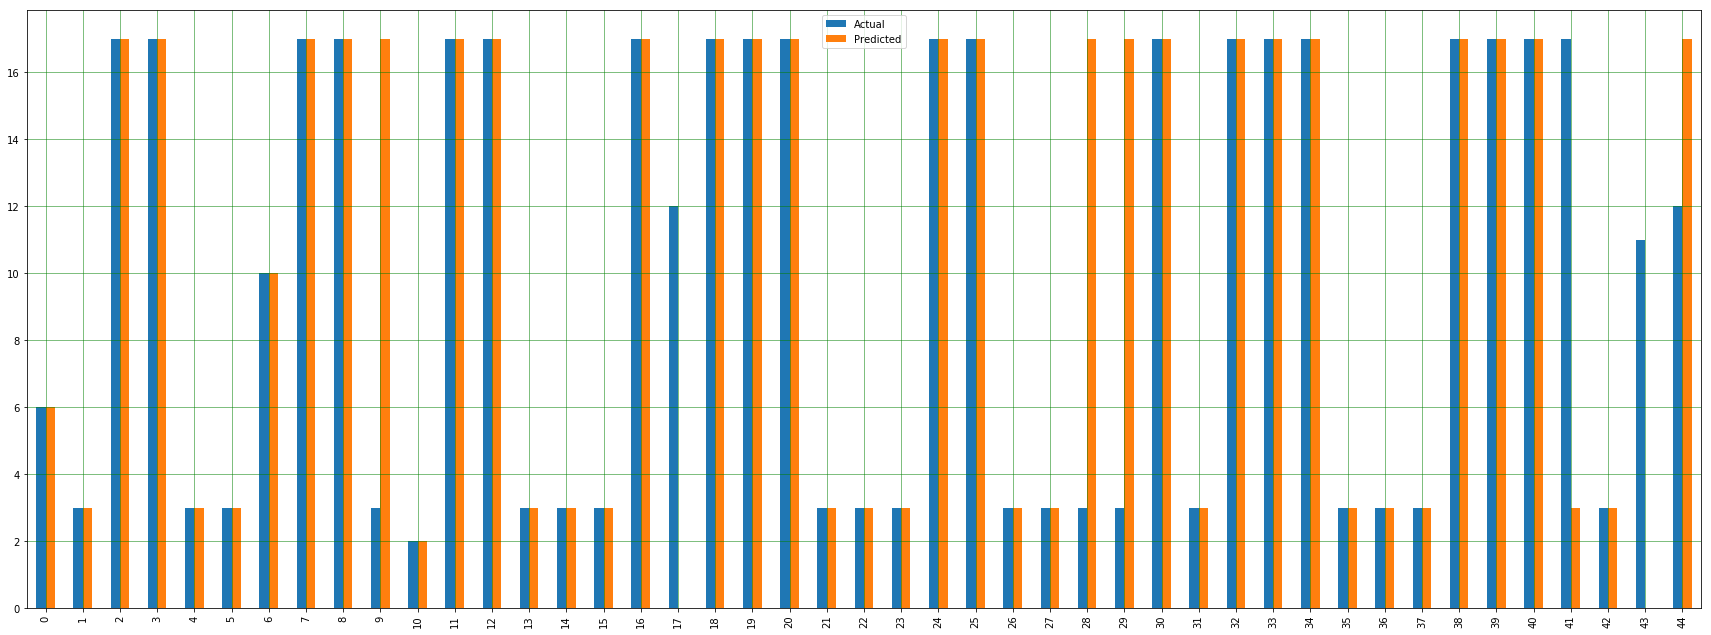

In [120]:
import matplotlib.pyplot as plt
actual_predcition = pd.DataFrame({"Actual": y_test.values.flatten(),"Predicted": y_pred.flatten()})
df1 = actual_predcition.head(45)
df1.plot(kind='bar',figsize=(30,11))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<h2>Logistic Regression </h2>

In [154]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [157]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[10.44261564]
[[ 4.57780552e+11  5.49857503e+11  8.25114575e+11  2.90177354e+11
   3.85731632e+11  1.85641928e+11  3.48146750e+11  1.60051605e+12
   4.19792989e+11  3.85731632e+11  4.83395849e+11  7.91157733e+11
   4.26970219e+11  8.84937065e+11  9.36822713e+11  1.29433280e+12
  -1.38732910e+00 -1.22976685e+00  1.58182844e+13 -5.15625000e-01
   7.08007812e-02 -8.72802734e-02 -1.89444234e+13 -2.03082275e+00
   1.04626465e+00  5.01661762e+07 -7.27539062e-01 -3.01757812e-01
  -2.01255798e-01  1.33551025e+00]]


In [159]:
y_pred = regressor.predict(X_test)

In [161]:
df_pred = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df_pred

,Actual,Predicted
0,6,9.127160
1,3,4.503325
2,17,10.546249
3,17,10.067360
4,3,9.566963
...,...,...
1495,3,4.139027
1496,12,6.429427
1497,17,11.842886
1498,17,11.336740


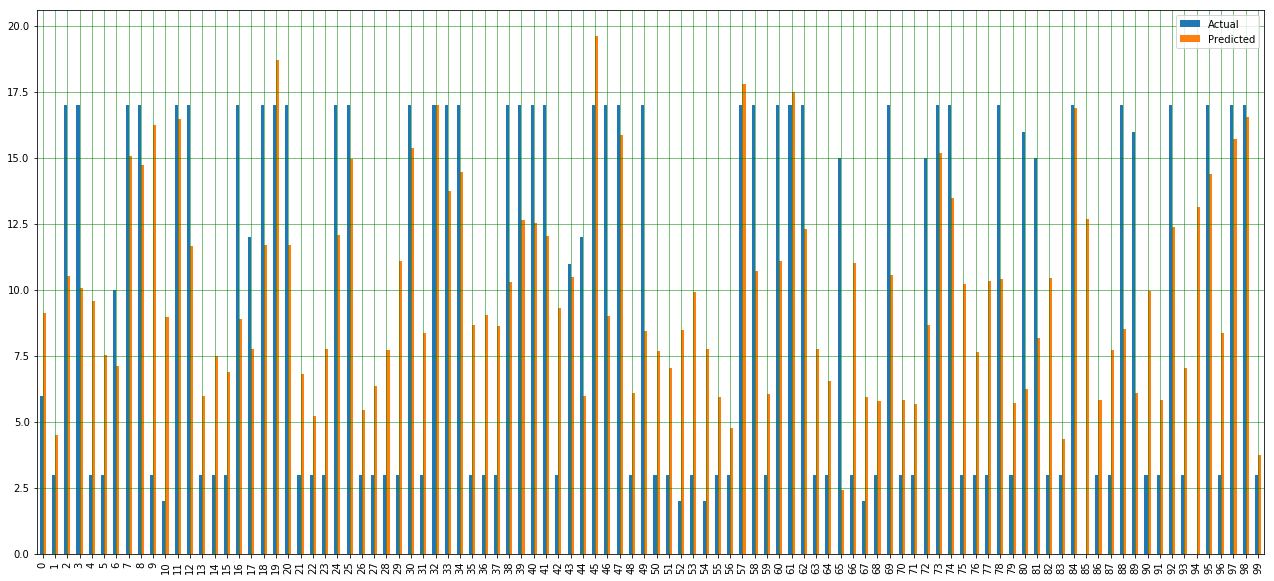

In [165]:
df1 = df_pred.head(100)
df1.plot(kind='bar',figsize=(22,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()